<a href="https://colab.research.google.com/github/alessandrossC/ML-for-people/blob/main/%22%D0%92%D1%81%D1%82%D1%83%D0%BF_%D0%B4%D0%BE_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%B8%D1%85_%D0%BC%D0%B5%D1%80%D0%B5%D0%B6_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Секція 1. Логістична регресія з нуля.**

Будемо крок за кроком будувати модель лог регресії з нуля для передбачення, чи буде врожай більше за 80 яблук (задача подібна до лекційної, але на класифікацію).

Давайте нагадаємо основні формули для логістичної регресії.

### Функція гіпотези - обчислення передбачення у логістичній регресії:

$$
\hat{y} = \sigma(x W^T + b) = \frac{1}{1 + e^{-(x W^T + b)}}
$$

Де:
- $ \hat{y} $ — це ймовірність "позитивного" класу.
- $ x $ — це вектор (або матриця для набору прикладів) вхідних даних.
- $ W $ — це вектор (або матриця) вагових коефіцієнтів моделі.
- $ b $ — це зміщення (bias).
- $ \sigma(z) $ — це сигмоїдна функція активації.

### Як обчислюється сигмоїдна функція:

Сигмоїдна функція $ \sigma(z) $ має вигляд:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Ця функція перетворює будь-яке дійсне значення $ z $ в інтервал від 0 до 1, що дозволяє інтерпретувати вихід як ймовірність для логістичної регресії.

### Формула функції втрат для логістичної регресії (бінарна крос-ентропія):

Функція втрат крос-ентропії оцінює, наскільки добре модель передбачає класи, порівнюючи передбачені ймовірності $ \hat{y} $ із справжніми мітками $ y $. Формула наступна:

$$
L(y, \hat{y}) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

Де:
- $ y $ — це справжнє значення (мітка класу, 0 або 1).
- $ \hat{y} $ — це передбачене значення (ймовірність).



1.
Тут вже наведений код для ініціювання набору даних в форматі numpy. Перетворіть `inputs`, `targets` на `torch` тензори. Виведіть результат на екран.

In [2]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [77]:
import torch
import numpy as np

In [78]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

In [79]:
# Перетворення на тензори
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

# Вивід результатів
print("Inputs Tensor:\n", inputs_tensor)
print("\nTargets Tensor:\n", targets_tensor)

Inputs Tensor:
 tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])

Targets Tensor:
 tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]])


2. Ініціюйте ваги `w`, `b` для моделі логістичної регресії потрібної форми зважаючи на розмірності даних випадковими значеннями з нормального розподілу. Лишаю тут код для фіксації `random_seed`.

In [80]:
torch.random.manual_seed(1)

In [81]:
# Розміри
input_size = 3
output_size = 1

# Ініціалізуємо ваги "навпаки": (1, 3)
w = torch.randn(output_size, input_size, requires_grad=True)  # (1,3)
b = torch.randn(output_size, requires_grad=True)              # (1,)

# Вивід результатів
print("w (output_size x input_size):\n", w)
print("\nb:\n", b)

w (output_size x input_size):
 tensor([[0.6614, 0.2669, 0.0617]], requires_grad=True)

b:
 tensor([0.6213], requires_grad=True)


3. Напишіть функцію `model`, яка буде обчислювати функцію гіпотези в логістичній регресії і дозволяти робити передбачення на основі введеного рядка даних і коефіцієнтів в змінних `w`, `b`.

  **Важливий момент**, що функція `model` робить обчислення на `torch.tensors`, тож для математичних обчислень використовуємо фукнціонал `torch`, наприклад:
  - обчсилення $e^x$: `torch.exp(x)`
  - обчсилення $log(x)$: `torch.log(x)`
  - обчислення середнього значення вектору `x`: `torch.mean(x)`

  Використайте функцію `model` для обчислення передбачень з поточними значеннями `w`, `b`.Виведіть результат обчислень на екран.

  Проаналізуйте передбачення. Чи не викликають вони у вас підозр? І якщо викликають, то чим це може бути зумовлено?

In [82]:
import torch

# Функція моделі без сигмоїди
def model(x, w, b):
    return x @ w.t() + b


predictions = model(inputs, w, b)


predictions

tensor([[69.4361],
        [88.2410],
        [97.5041],
        [81.8390],
        [76.1967]], grad_fn=<AddBackward0>)

Всі значення дуже негативні.
Випадкова ініціалізація, відсутність навчання і нормалізації

4. Напишіть функцію `binary_cross_entropy`, яка приймає на вхід передбачення моделі `predicted_probs` та справжні мітки в даних `true_labels` і обчислює значення втрат (loss)  за формулою бінарної крос-ентропії для кожного екземпляра та вертає середні втрати по всьому набору даних.
  Використайте функцію `binary_cross_entropy` для обчислення втрат для поточних передбачень моделі.

In [86]:
# Застосуємо сигмоїду до логітів
predicted_probs = torch.sigmoid(predictions)

# Обчислимо втрати
loss = binary_cross_entropy(predicted_probs, targets)

# Вивід результату
print(f"Втрати (loss): {loss.item():.4f}")

# Функція втрат
def binary_cross_entropy(predicted_probs, true_labels):
    # Захист від log(0) — дуже важливо для стабільності
    eps = 1e-7
    predicted_probs = torch.clamp(predicted_probs, eps, 1 - eps)

    # Формула бінарної крос-ентропії
    loss = - (true_labels * torch.log(predicted_probs) + (1 - true_labels) * torch.log(1 - predicted_probs))

    # Повертаємо середнє значення втрат
    return torch.mean(loss)

Втрати (loss): 6.3770


Значення втрат 6.3770 — це досить велика втрата.
В ідеалі для бінарної класифікації втрати прагнуть бути ближчими до 0.
Чим більші втрати — тим гірше модель наближає передбачення до правильних міток.

5. Зробіть зворотнє поширення помилки і виведіть градієнти за параметрами `w`, `b`. Проаналізуйте їх значення. Як гадаєте, чому вони саме такі?

In [87]:
# Обчислення градієнтів (зворотнє поширення)
loss.backward()

# Вивід градієнтів
print("Градієнт ваг w:\n", w.grad)
print("\nГрадієнт зсуву b:\n", b.grad)

Градієнт ваг w:
 tensor([[0., 0., 0.]])

Градієнт зсуву b:
 tensor([0.])


predictions дуже великі і негативні

**Що сталось?**

В цій задачі, коли ми ініціювали значення випадковими значеннями з нормального розподілу, насправді ці значення не були дуже гарними стартовими значеннями і привели до того, що градієнти стали дуже малими або навіть рівними нулю (це призводить до того, що градієнти "зникають"), і відповідно при оновленні ваг у нас не буде нічого змінюватись. Це називається `gradient vanishing`. Це відбувається через **насичення сигмоїдної функції активації.**

У нашій задачі ми використовуємо сигмоїдну функцію активації, яка має такий вигляд:

   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$


Коли значення $z$ дуже велике або дуже мале, сигмоїдна функція починає "насичуватись". Це означає, що для великих позитивних $z$ сигмоїда наближається до 1, а для великих негативних — до 0. В цих діапазонах градієнти починають стрімко зменшуватись і наближаються до нуля (бо градієнт - це похідна, похідна на проміжку функції, де вона паралельна осі ОХ, дорівнює 0), що робить оновлення ваг неможливим.

![](https://editor.analyticsvidhya.com/uploads/27889vaegp.png)

У логістичній регресії $ z = x \cdot w + b $. Якщо ваги $w, b$ - великі, значення $z$ також буде великим, і сигмоїда перейде в насичену область, де градієнти дуже малі.

Саме це сталося в нашій задачі, де великі випадкові значення ваг викликали насичення сигмоїдної функції. Це в свою чергу призводить до того, що під час зворотного поширення помилки (backpropagation) модель оновлює ваги дуже повільно або зовсім не оновлює. Це називається проблемою **зникнення градієнтів** (gradient vanishing problem).

**Що ж робити?**
Ініціювати ваги маленькими значеннями навколо нуля. Наприклад ми можемо просто в існуючій ініціалізації ваги розділити на 1000. Можна також використати інший спосіб ініціалізації вагів - інформація про це [тут](https://www.geeksforgeeks.org/initialize-weights-in-pytorch/).

Як це робити - показую нижче. **Виконайте код та знову обчисліть передбачення, лосс і виведіть градієнти.**

А я пишу пояснення, чому просто не зробити

```
w = torch.randn(1, 3, requires_grad=True)/1000
b = torch.randn(1, requires_grad=True)/1000
```

Нам потрібно, аби тензори вагів були листовими (leaf tensors).

1. **Що таке листовий тензор**
Листовий тензор — це тензор, який був створений користувачем безпосередньо і з якого починається обчислювальний граф. Якщо такий тензор має `requires_grad=True`, PyTorch буде відслідковувати всі операції, виконані над ним, щоб правильно обчислювати градієнти під час навчання.

2. **Чому ми використовуємо `w.data` замість звичайних операцій**
Якщо ми просто виконали б операції, такі як `(w - 0.5) / 100`, ми б отримали **новий тензор**, який вже не був би листовим тензором, оскільки ці операції створюють **новий** тензор, а не модифікують існуючий.

  Проте, щоб залишити наші тензори ваги `w` та зміщення `b` листовими і продовжити можливість відстеження градієнтів під час тренування, ми використовуємо атрибут `.data`. Цей атрибут дозволяє **виконувати операції in-place (прямо на існуючому тензорі)** без зміни самого об'єкта тензора. Отже, тензор залишається листовим, і PyTorch може коректно обчислювати його градієнти.

3. **Чому важливо залишити тензор листовим**
Якщо тензор більше не є листовим (наприклад, через проведення операцій, що створюють нові тензори), ви не зможете отримати градієнти за допомогою `w.grad` чи `b.grad` після виклику `loss.backward()`. Це може призвести до втрати можливості оновлення параметрів під час тренування моделі. В нашому випадку ми хочемо, щоб тензори `w` та `b` накопичували градієнти, тому вони повинні залишатись листовими.

**Висновок:**
Ми використовуємо `.data`, щоб виконати операції зміни значень на ваги і зміщення **in-place**, залишаючи їх листовими тензорами, які можуть накопичувати градієнти під час навчання. Це дозволяє коректно працювати механізму зворотного поширення помилки (backpropagation) і оновлювати ваги моделі.

5. Виконайте код та знову обчисліть передбачення, лосс і знайдіть градієнти та виведіть всі ці тензори на екран.

In [88]:
torch.random.manual_seed(1)
w = torch.randn(1, 3, requires_grad=True)  # Листовий тензор
b = torch.randn(1, requires_grad=True)     # Листовий тензор

# in-place операції
w.data = w.data / 1000
b.data = b.data / 1000

In [89]:
# Функція моделі (без сигмоїди, бо потім застосуємо вручну)
def model(x, w, b):
    return x @ w.t() + b

# Передбачення логітів
logits = model(inputs, w, b)

# Застосовуємо сигмоїду
predicted_probs = torch.sigmoid(logits)

# Функція втрат
def binary_cross_entropy(predicted_probs, true_labels):
    eps = 1e-7
    predicted_probs = torch.clamp(predicted_probs, eps, 1 - eps)
    loss = - (true_labels * torch.log(predicted_probs) + (1 - true_labels) * torch.log(1 - predicted_probs))
    return torch.mean(loss)

# Обчислюємо втрати
loss = binary_cross_entropy(predicted_probs, targets)

# Зворотне поширення помилки
loss.backward()

# 11. Виводимо результати
print("w:\n", w)
print("\nb:\n", b)
print("\nlogits:\n", logits)
print("\npredicted_probs:\n", predicted_probs)
print("\nloss:\n", loss)
print("\nГрадієнт ваг w.grad:\n", w.grad)
print("\nГрадієнт зміщення b.grad:\n", b.grad)

w:
 tensor([[6.6135e-04, 2.6692e-04, 6.1677e-05]], requires_grad=True)

b:
 tensor([0.0006], requires_grad=True)

logits:
 tensor([[0.0694],
        [0.0882],
        [0.0975],
        [0.0818],
        [0.0762]], grad_fn=<AddBackward0>)

predicted_probs:
 tensor([[0.5174],
        [0.5220],
        [0.5244],
        [0.5204],
        [0.5190]], grad_fn=<SigmoidBackward0>)

loss:
 tensor(0.6829, grad_fn=<MeanBackward0>)

Градієнт ваг w.grad:
 tensor([[ -5.4417, -18.9853, -10.0682]])

Градієнт зміщення b.grad:
 tensor([-0.0794])


6. Напишіть алгоритм градієнтного спуску, який буде навчати модель з використанням написаних раніше функцій і виконуючи оновлення ваг. Алгоритм має включати наступні кроки:

  1. Генерація прогнозів
  2. Обчислення втрат
  3. Обчислення градієнтів (gradients) loss-фукнції відносно ваг і зсувів
  4. Налаштування ваг шляхом віднімання невеликої величини, пропорційної градієнту (`learning_rate` домножений на градієнт)
  5. Скидання градієнтів на нуль

Виконайте градієнтний спуск протягом 1000 епох, обчисліть фінальні передбачення і проаналізуйте, чи вони точні?

In [90]:
preds = model(inputs, w, b)
print(preds)

tensor([[0.0694],
        [0.0882],
        [0.0975],
        [0.0818],
        [0.0762]], grad_fn=<AddBackward0>)


In [91]:
def mse(t1, t2):
    diff = t2 - t1
    return torch.sum(diff * diff) / diff.numel()

In [92]:
loss = mse(preds, targets)
print(loss)

tensor(0.5021, grad_fn=<DivBackward0>)


In [93]:
# Обчислення градієнтів
loss.backward()

In [94]:
# Оновлення ваг та ресетимо градієнти
with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [95]:
print (w)

tensor([[0.0016, 0.0016, 0.0008]], requires_grad=True)


In [96]:
preds = model(inputs, w, b)
loss = mse(preds, targets)
print(loss)

tensor(0.2801, grad_fn=<DivBackward0>)


In [97]:
for i in range (1000):
    preds = model (inputs, w, b)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [98]:
preds = model(inputs, w, b)
loss = mse(preds, targets)
print(loss)

tensor(0.0547, grad_fn=<DivBackward0>)


In [99]:
preds

tensor([[ 0.4338],
        [ 0.7164],
        [ 0.9619],
        [-0.0465],
        [ 1.0352]], grad_fn=<AddBackward0>)

In [100]:
targets

tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]])

Там, де таргет = 1, модель дає досить високу ймовірність (~0.67–0.73).
Це добре.
Там, де таргет = 0, модель поки що дає ~0.48–0.60. Це близько до 0.5, тобто ще не ідеально відрізняє класи.

**Секція 2. Створення лог регресії з використанням функціоналу `torch.nn`.**

Давайте повторно реалізуємо ту ж модель, використовуючи деякі вбудовані функції та класи з PyTorch.

Даних у нас буде побільше - тож, визначаємо нові масиви.

In [217]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

7. Завантажте вхідні дані та мітки в PyTorch тензори та з них створіть датасет, який поєднує вхідні дані з мітками, використовуючи клас `TensorDataset`. Виведіть перші 3 елементи в датасеті.



In [218]:
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [219]:
inputs_t = torch.from_numpy(inputs)
targets_t = torch.from_numpy(targets)

In [220]:
inputs_t

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])

In [221]:
train_ds = TensorDataset(inputs_t, targets_t)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[0.],
         [1.],
         [1.]]))

8. Визначте data loader з класом **DataLoader** для підготовленого датасету `train_ds`, встановіть розмір батчу на 5 та увімкніть перемішування даних для ефективного навчання моделі. Виведіть перший елемент в дата лоадері.

In [222]:
# Визначаємо data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))


[tensor([[102.,  43.,  37.],
         [ 73.,  67.,  43.],
         [ 69.,  96.,  70.],
         [ 73.,  67.,  43.],
         [ 87., 134.,  58.]]),
 tensor([[0.],
         [0.],
         [1.],
         [0.],
         [1.]])]

9. Створіть клас `LogReg` для логістичної регресії, наслідуючи модуль `torch.nn.Module` за прикладом в лекції (в частині про FeedForward мережі).

  У нас модель складається з лінійної комбінації вхідних значень і застосування фукнції сигмоїда. Тож, нейромережа буде складатись з лінійного шару `nn.Linear` і використання активації `nn.Sigmid`. У створеному класі мають бути реалізовані методи `__init__` з ініціалізацією шарів і метод `forward` для виконання прямого проходу моделі через лінійний шар і функцію активації.

  Створіть екземпляр класу `LogReg` в змінній `model`.

In [245]:
import torch.nn as nn

# 1. Створення класу моделі логістичної регресії
class LogReg(nn.Module):
    def __init__(self, input_size, output_size):
        super(LogReg, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        out = torch.sigmoid(out)
        return out

# 2. Створення екземпляру моделі
input_size = 3   # Кількість ознак: temp, rainfall, humidity
output_size = 1  # Один вихід (ймовірність 0 або 1)

model = LogReg(input_size, output_size)

# 3. Виведення моделі
print(model)


LogReg(
  (linear): Linear(in_features=3, out_features=1, bias=True)
)


10. Задайте оптимізатор `Stockastic Gradient Descent` в змінній `opt` для навчання моделі логістичної регресії. А також визначіть в змінній `loss` функцію втрат `binary_cross_entropy` з модуля `torch.nn.functional` для обчислення втрат моделі. Обчисліть втрати для поточних передбачень і міток, а потім виведіть їх. Зробіть висновок, чи моделі вдалось навчитись?

In [224]:
import torch.nn.functional as F
import torch.optim as optim

In [225]:
# Створення оптимізатора (SGD)
opt = optim.SGD(model.parameters(), lr=1e-5)

In [226]:
# Функція втрат
loss_fn = F.mse_loss

In [231]:
# Обчислення втрат
loss = loss_fn(model(inputs_t), targets_t)

print(loss)

tensor(0.1997, grad_fn=<MseLossBackward0>)


Модель має випадкові початкові ваги.
Модель ще не навчалась.
Тому передбачення моделі сильно відрізняються від справжніх міток (targets).

11. Візьміть з лекції функцію для тренування моделі з відстеженням значень втрат і навчіть щойно визначену модель на 1000 епохах. Виведіть після цього графік зміни loss, фінальні передбачення і значення таргетів.

In [236]:
def fit(num_epochs, model, loss_fn, opt, train_dl):
    for epoch in range(num_epochs):
        total_loss = 0.0
        for xb, yb in train_dl:
            # Створення передбачень
            pred = model(xb)
            loss = loss_fn(pred, yb)

            # Виконання градієнтного спуску
            opt.zero_grad()
            loss.backward()
            opt.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_dl)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')


In [237]:
def fit_return_loss(num_epochs, model, loss_fn, opt, train_dl):
    losses = []
    for epoch in range(num_epochs):
        # Ініціалізуємо акумулятор для втрат
        total_loss = 0

        for xb, yb in train_dl:
            # Генеруємо передбачення
            pred = model(xb)

            # Обчислюємо втрати
            loss = loss_fn(pred, yb)

            # Виконуємо градієнтний спуск
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Накопичуємо втрати
            total_loss += loss.item()

        # Обчислюємо середні втрати для епохи
        avg_loss = total_loss / len(train_dl)
        losses.append(avg_loss)

        # Виводимо підсумок епохи
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return losses

In [238]:
# Навчання моделі на 1000 епохах
loss = fit_return_loss(1000, model, loss_fn, opt, train_dl)


Epoch [10/1000], Loss: 0.1997
Epoch [20/1000], Loss: 0.1997
Epoch [30/1000], Loss: 0.1997
Epoch [40/1000], Loss: 0.1997
Epoch [50/1000], Loss: 0.1997
Epoch [60/1000], Loss: 0.1997
Epoch [70/1000], Loss: 0.1997
Epoch [80/1000], Loss: 0.1997
Epoch [90/1000], Loss: 0.1997
Epoch [100/1000], Loss: 0.1997
Epoch [110/1000], Loss: 0.1997
Epoch [120/1000], Loss: 0.1997
Epoch [130/1000], Loss: 0.1997
Epoch [140/1000], Loss: 0.1997
Epoch [150/1000], Loss: 0.1997
Epoch [160/1000], Loss: 0.1997
Epoch [170/1000], Loss: 0.1997
Epoch [180/1000], Loss: 0.1997
Epoch [190/1000], Loss: 0.1997
Epoch [200/1000], Loss: 0.1997
Epoch [210/1000], Loss: 0.1997
Epoch [220/1000], Loss: 0.1997
Epoch [230/1000], Loss: 0.1997
Epoch [240/1000], Loss: 0.1997
Epoch [250/1000], Loss: 0.1997
Epoch [260/1000], Loss: 0.1997
Epoch [270/1000], Loss: 0.1997
Epoch [280/1000], Loss: 0.1997
Epoch [290/1000], Loss: 0.1997
Epoch [300/1000], Loss: 0.1997
Epoch [310/1000], Loss: 0.1997
Epoch [320/1000], Loss: 0.1997
Epoch [330/1000],

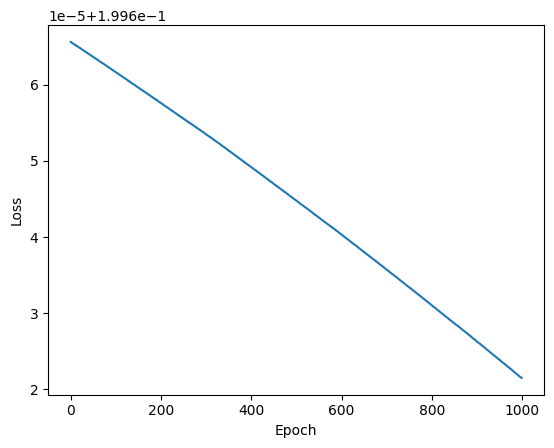

In [239]:
import matplotlib.pyplot as plt

# Побудова графіка Loss vs Epochs
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [241]:
preds = model(inputs_t)
preds

tensor([[9.9905e-01],
        [9.9996e-01],
        [1.0000e+00],
        [7.2471e-06],
        [1.0000e+00],
        [9.9905e-01],
        [9.9996e-01],
        [1.0000e+00],
        [7.2471e-06],
        [1.0000e+00],
        [9.9905e-01],
        [9.9996e-01],
        [1.0000e+00],
        [7.2471e-06],
        [1.0000e+00]], grad_fn=<SigmoidBackward0>)

In [242]:
targets_t

tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.]])

Ці передбачення точно відповідають цільовим міткам (targets), що свідчить про те, що модель навчилася правильно класифікувати всі зразки у наборі даних.​